## Library Imports

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## Reading Data

In [3]:
# Get the current working directory
current_dir = os.getcwd()
current_dir

'/Users/vinceli/data3001-data-racing-3/code'

In [4]:
sim2024_df = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'F124 Data Export UNSW.csv'))
sim2023_df = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-data-2023.csv'))
sim2022_df = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-data-2022.csv'))
sim_left_df = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-ref-left.csv'))
sim_right_df = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-ref-right.csv'))
sim_turns_df = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-ref-turns.csv'))


## Data Cleaning

In [5]:
# Combine simulation data for 2022 and 2023 

f1sim_df = pd.concat([sim2022_df, sim2023_df], ignore_index=True)

In [9]:
f1sim_df

,version https://git-lfs.github.com/spec/v1
0,oid sha256:8c593b84565d72d097f70d8cc42457d1f62...
1,size 199876608
2,oid sha256:fc50ee94e1cce5b6aaf0f77633a32b29035...
3,size 312524800


In [7]:
combined_nan_count = f1sim_df.isna().sum()
# print(combined_nan_count)

nan_count_2023 = sim2023_df.isna().sum()
print(nan_count_2023)

version https://git-lfs.github.com/spec/v1    0
dtype: int64


In [8]:
# Removing unnecessary columns
# Could already filter on sector 1 since we're only interested in this section of the track
# Remove sector time columns and then also drop the sector column
f1sim_df["SECTOR"].value_counts()
f1sim_sector0_df = f1sim_df[f1sim_df["SECTOR"] == 0]
f1sim_sector0_df

KeyError: 'SECTOR'

In [26]:
nan_count = f1sim_sector0_df.isna().sum()
print(nan_count)

# should we remove session_identifiers that have null values or just the rows

SESSION_IDENTIFIER        0
FRAME                     0
LAP_NUM                   0
SECTOR                    0
LAP_DISTANCE              0
CURRENT_LAP_TIME_MS       0
SECTOR_1_TIME_MS          0
SECTOR_2_TIME_MS          0
LAP_TIME_MS               0
SECTOR_3_MS               0
SPEED_KPH                 0
THROTTLE                  0
BRAKE                     0
GEAR                      0
ENGINE_RPM                0
STEERING                  0
YAW                    1617
PITCH                  1617
ROLL                   1617
WORLDPOSX                39
WORLDPOSY                39
WORLDPOSZ              1617
WORLDFORWARDDIRX       1617
WORLDFORWARDDIRY       1617
WORLDFORWARDDIRZ       1617
WORLDRIGHTDIRX         1617
WORLDRIGHTDIRY         1617
WORLDRIGHTDIRZ         1617
dtype: int64


In [27]:
f1sim_filtered_df = f1sim_sector0_df[f1sim_sector0_df["LAP_DISTANCE"] < 1158]
f1sim_filtered_df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,...,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ
0,1.004555e+19,1403,1,0,243.045959,2844,29433,18320,86008.0,38255.0,...,-0.023934,287.412811,298.471619,1.760029,-24167.0,-12.0,-22126.0,22120.0,784.0,-24160.0
1,1.004555e+19,1408,1,0,266.444916,3111,29433,18320,86008.0,38255.0,...,-0.021614,304.667603,282.659576,1.781548,-23858.0,105.0,-22460.0,22456.0,708.0,-23851.0
2,1.004555e+19,1416,1,0,297.438477,3486,29433,18320,86008.0,38255.0,...,-0.018019,326.941986,261.094025,1.882867,-23467.0,101.0,-22867.0,22865.0,590.0,-23462.0
3,1.004555e+19,1418,1,0,306.238770,3603,29433,18320,86008.0,38255.0,...,-0.015977,333.254730,254.958725,1.920085,-23584.0,172.0,-22747.0,22746.0,523.0,-23579.0
4,1.004555e+19,1470,1,0,441.464752,6106,29433,18320,86008.0,38255.0,...,-0.012085,370.639648,141.009048,2.337044,10302.0,-150.0,-31104.0,31103.0,395.0,10300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853828,9.922656e+18,3845,2,0,1153.107422,20587,36499,22353,102385.0,43533.0,...,-0.026105,706.021301,-433.571320,2.848758,26458.0,-521.0,-19322.0,19329.0,855.0,26444.0
1853829,9.922656e+18,3846,2,0,1154.201660,20637,36499,22353,102385.0,43533.0,...,-0.026407,704.912598,-434.376434,2.828011,26807.0,-602.0,-18832.0,18841.0,865.0,26793.0
1853830,9.922656e+18,3847,2,0,1155.273438,20687,36499,22353,102385.0,43533.0,...,-0.031669,703.808167,-435.149231,2.803751,27185.0,-609.0,-18282.0,18292.0,1037.0,27165.0
1853831,9.922656e+18,3848,2,0,1156.328125,20737,36499,22353,102385.0,43533.0,...,-0.035166,702.703247,-435.889160,2.777668,27560.0,-621.0,-17711.0,17721.0,1151.0,27537.0


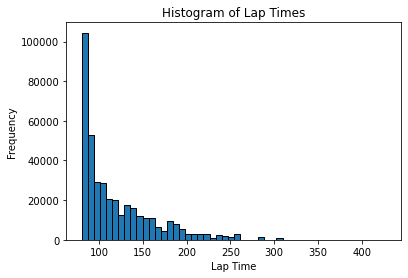

In [28]:
# Looking at Lap Times
# Create histogram
plt.hist(f1sim_filtered_df["LAP_TIME_MS"]/1000, bins=50, edgecolor='black')

# Add title and labels
plt.title('Histogram of Lap Times')
plt.xlabel('Lap Time')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [10]:
# Filter out bad lap_times 
# f1sim_fast_df = f1sim_sector0_df[f1sim_sector0_df["LAP_TIME_MS"]/1000 < 120]
# f1sim_fast_df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,...,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ
0,1.004555e+19,1403,1,0,243.045959,2844,29433,18320,86008.0,38255.0,...,-0.023934,287.412811,298.471619,1.760029,-24167.0,-12.0,-22126.0,22120.0,784.0,-24160.0
1,1.004555e+19,1408,1,0,266.444916,3111,29433,18320,86008.0,38255.0,...,-0.021614,304.667603,282.659576,1.781548,-23858.0,105.0,-22460.0,22456.0,708.0,-23851.0
2,1.004555e+19,1416,1,0,297.438477,3486,29433,18320,86008.0,38255.0,...,-0.018019,326.941986,261.094025,1.882867,-23467.0,101.0,-22867.0,22865.0,590.0,-23462.0
3,1.004555e+19,1418,1,0,306.238770,3603,29433,18320,86008.0,38255.0,...,-0.015977,333.254730,254.958725,1.920085,-23584.0,172.0,-22747.0,22746.0,523.0,-23579.0
4,1.004555e+19,1470,1,0,441.464752,6106,29433,18320,86008.0,38255.0,...,-0.012085,370.639648,141.009048,2.337044,10302.0,-150.0,-31104.0,31103.0,395.0,10300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854133,9.922656e+18,4159,2,0,1749.684570,36286,36499,22353,102385.0,43533.0,...,0.005214,375.733337,-807.596863,3.237786,29462.0,10.0,-14339.0,14339.0,-170.0,29462.0
1854134,9.922656e+18,4160,2,0,1752.812012,36336,36499,22353,102385.0,43533.0,...,-0.000536,372.910522,-808.969299,3.234098,29460.0,2.0,-14344.0,14344.0,17.0,29460.0
1854135,9.922656e+18,4161,2,0,1755.945312,36386,36499,22353,102385.0,43533.0,...,-0.005583,370.083557,-810.344543,3.229301,29453.0,-32.0,-14358.0,14358.0,182.0,29453.0
1854136,9.922656e+18,4162,2,0,1759.090332,36436,36499,22353,102385.0,43533.0,...,-0.009760,367.247559,-811.726196,3.220385,29441.0,-76.0,-14383.0,14383.0,319.0,29439.0


      SESSION_IDENTIFIER  LAP_NUM  AVG_TIME_PER_FRAME_MS  AVG_FRAME_RATE_FPS
0           5.892042e+16        1              55.357367           18.064443
1           5.892042e+16        2              55.130303           18.138845
2           9.718583e+16        1              50.002747           19.998901
3           9.718583e+16        2              50.145299           19.942049
4           9.718583e+16        3              50.002786           19.998886
...                  ...      ...                    ...                 ...
1348        1.834959e+19        2              50.071527           19.971430
1349        1.839489e+19        1              55.378313           18.057610
1350        1.839489e+19        2              56.157996           17.806903
1351        1.843892e+19        1              70.604478           14.163408
1352        1.843892e+19        2              60.226667           16.603941

[1353 rows x 4 columns]
12.672040014433728
9.035166661977794


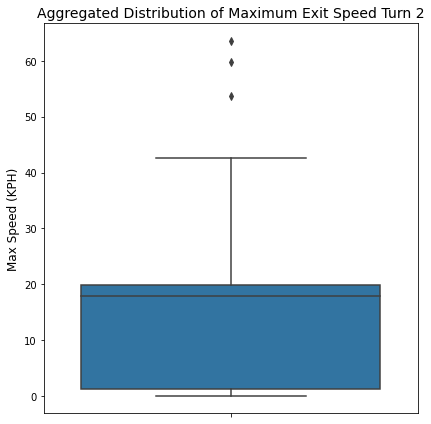

In [29]:
# Frame Rates
import seaborn as sns
frame_counts = f1sim_filtered_df.groupby(['SESSION_IDENTIFIER', 'LAP_NUM']).size().reset_index(name='FRAME_COUNT')

# Assuming 'df' is the DataFrame
# Sort by session and frame to ensure correct frame sequencing
df_sorted = f1sim_filtered_df.sort_values(by=['SESSION_IDENTIFIER', 'FRAME'])

# Calculate the time difference between consecutive frames within the same session
df_sorted['TIME_DIFF_MS'] = df_sorted.groupby(['SESSION_IDENTIFIER', 'LAP_NUM'])['CURRENT_LAP_TIME_MS'].diff()

# Drop rows where the time difference is NaN (the first frame in each session group)
df_sorted = df_sorted.dropna(subset=['TIME_DIFF_MS'])

# Calculate the average time per frame in milliseconds for each session
average_time_per_frame_ms = df_sorted.groupby(['SESSION_IDENTIFIER', 'LAP_NUM'])['TIME_DIFF_MS'].mean().reset_index(name='AVG_TIME_PER_FRAME_MS')

# Convert the average time per frame from milliseconds to seconds
average_time_per_frame_s = average_time_per_frame_ms['AVG_TIME_PER_FRAME_MS'] / 1000

# Calculate the average frame rate (frames per second)
average_frame_rate = 1 / average_time_per_frame_s

# Add the frame rate to the DataFrame
average_time_per_frame_ms['AVG_FRAME_RATE_FPS'] = average_frame_rate

# Display the result
print(average_time_per_frame_ms)

filtered_df = average_time_per_frame_ms[average_time_per_frame_ms['AVG_FRAME_RATE_FPS'] > 12]

mean_value = average_time_per_frame_ms['AVG_FRAME_RATE_FPS'].mean()
std_deviation = average_time_per_frame_ms['AVG_FRAME_RATE_FPS'].std()

print(mean_value)
print(std_deviation)

plt.figure(figsize=(6, 6))

# Create a single box plot for the aggregated maximum speeds
sns.boxplot(y='AVG_FRAME_RATE_FPS', data=average_time_per_frame_ms)

# Customize the plot
plt.title('Aggregated Distribution of Maximum Exit Speed Turn 2', fontsize=14)
plt.ylabel('Max Speed (KPH)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
filtered_df

,SESSION_IDENTIFIER,LAP_NUM,AVG_TIME_PER_FRAME_MS,AVG_FRAME_RATE_FPS
0,5.892042e+16,1,55.417989,18.044682
1,5.892042e+16,2,55.281853,18.089119
2,9.718583e+16,1,50.077441,19.969071
3,9.718583e+16,2,50.726631,19.713511
4,9.718583e+16,3,50.018998,19.992404
...,...,...,...,...
987,1.797894e+19,3,56.369318,17.740147
989,1.822200e+19,1,55.640351,17.972568
990,1.822200e+19,2,55.472527,18.026941
991,1.839489e+19,1,55.728682,17.944081


In [30]:
# we need to filter out frame rates that are too low
# For our definition we will consider frame rates per second over 15

f1sim_frame_df = f1sim_filtered_df[f1sim_filtered_df["SESSION_IDENTIFIER"].isin(list(filtered_df["SESSION_IDENTIFIER"]))]
print(f1sim_frame_df.shape[0]-f1sim_filtered_df.shape[0])

-10882


In [31]:
f1sim_filtered_df.columns

Index(['SESSION_IDENTIFIER', 'FRAME', 'LAP_NUM', 'SECTOR', 'LAP_DISTANCE',
       'CURRENT_LAP_TIME_MS', 'SECTOR_1_TIME_MS', 'SECTOR_2_TIME_MS',
       'LAP_TIME_MS', 'SECTOR_3_MS', 'SPEED_KPH', 'THROTTLE', 'BRAKE', 'GEAR',
       'ENGINE_RPM', 'STEERING', 'YAW', 'PITCH', 'ROLL', 'WORLDPOSX',
       'WORLDPOSY', 'WORLDPOSZ', 'WORLDFORWARDDIRX', 'WORLDFORWARDDIRY',
       'WORLDFORWARDDIRZ', 'WORLDRIGHTDIRX', 'WORLDRIGHTDIRY',
       'WORLDRIGHTDIRZ'],
      dtype='object')

In [32]:
# Remove unnecessary columns

f1_filtered_df = f1sim_frame_df[[
    "SESSION_IDENTIFIER", 
    "FRAME", 
    "LAP_NUM", 
    "LAP_DISTANCE", 
    "CURRENT_LAP_TIME_MS", 
    "SPEED_KPH", 
    "THROTTLE", 
    "BRAKE",
    "STEERING", 
    "WORLDPOSX", 
    "WORLDPOSY"
    ]]

In [33]:
f1_filtered_df["LAP_ID"] = f1_filtered_df["SESSION_IDENTIFIER"].astype(str) + "_" + f1_filtered_df["LAP_NUM"].astype(str)

C:\Users\keywo\AppData\Local\Temp/ipykernel_24904/1397210192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1_filtered_df["LAP_ID"] = f1_filtered_df["SESSION_IDENTIFIER"].astype(str) + "_" + f1_filtered_df["LAP_NUM"].astype(str)


In [34]:
# Having a look at the distance in Sector 0
df_sorted = f1_filtered_df.sort_values(by=['SESSION_IDENTIFIER', 'LAP_NUM', 'FRAME'])

# Get the last frame for each SESSION_IDENTIFIER and LAP_NUM group
last_frames = df_sorted.groupby(['SESSION_IDENTIFIER', 'LAP_NUM']).tail(1)

# Display or work with the result
print(last_frames)

average_frame = last_frames['LAP_DISTANCE'].mean()

# Print the average frame value
print(f"Sector 0 is approximately: {average_frame}")

         SESSION_IDENTIFIER  FRAME  LAP_NUM  LAP_DISTANCE  \
547233         5.892042e+16   1122        1   1157.536499   
548824         5.892042e+16   3124        2   1157.422852   
1837267        9.718583e+16   1368        1   1157.687988   
1839145        9.718583e+16   3253        2   1157.137695   
1840797        9.718583e+16   4925        3   1157.781250   
...                     ...    ...      ...           ...   
1345659        1.834959e+19   6579        2   1157.234863   
361620         1.839489e+19   1565        1   1156.919556   
363451         1.839489e+19   3933        2   1157.382324   
365837         1.843892e+19   1906        1   1157.865845   
371005         1.843892e+19   9342        2   1157.606445   

         CURRENT_LAP_TIME_MS  SPEED_KPH  THROTTLE  BRAKE  STEERING  \
547233                 17659       86.0  0.000000    0.0  1.000000   
548824                 18193      120.0  1.000000    0.0  0.801236   
1837267                18201       97.0  0.674311    0.0 

In [18]:
# Find the distance up until Turn 3
sim_turns_df

,TURN,APEX_X1,APEX_Y1,CORNER_X1,CORNER_Y1,CORNER_X2,CORNER_Y2
0,1,375.570000,191.519000,315,145,405,260
1,2,368.930000,90.000000,350,0,402,145
2,3,727.500000,-393.438930,702,-443,750,-295
3,4,601.000000,-455.000000,565,-535,645,-400
4,5,599.030370,-643.970000,535,-725,640,-580
5,6,235.931194,-862.330000,200,-912,290,-812
6,7,159.135352,-832.110000,105,-882,199,-782
7,8,-65.000000,-710.000000,-115,-810,-15,-600
8,9,-271.023529,232.624700,-325,182,-220,282
9,10,-390.782540,231.142360,-430,181,-330,281


In [36]:
def avg_track_distance_to_point(data, point):

    data['distance_to_corner'] = ((data['WORLDPOSX'] - point[0])**2 + 
                                     (data['WORLDPOSY'] - point[1])**2)**0.5

    # Get the row with the smallest distance (i.e., closest point to the corner)
    closest_frame = data.loc[data['distance_to_corner'].idxmin()]

    # Extract the LAP_DISTANCE at this frame
    lap_distance_at_turn3 = closest_frame['LAP_DISTANCE']

    # Display the result
    return lap_distance_at_turn3

In [45]:
turn_1_entry = [368.930000,90]
avg_track_distance_to_point(f1_filtered_df, turn_1_entry)

C:\Users\keywo\AppData\Local\Temp/ipykernel_24904/3235267706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance_to_corner'] = ((data['WORLDPOSX'] - point[0])**2 +


495.068359375

In [19]:
corner_x1_turn3 = 702
corner_y1_turn3 = -443

# Find the frame where WORLDPOSX and WORLDPOSY are closest to the Turn 3 CORNER_X1 and CORNER_Y1
f1sim_filtered_df['distance_to_corner'] = ((f1sim_filtered_df['WORLDPOSX'] - corner_x1_turn3)**2 + 
                                     (f1sim_filtered_df['WORLDPOSY'] - corner_y1_turn3)**2)**0.5

# Get the row with the smallest distance (i.e., closest point to the corner)
closest_frame = f1sim_filtered_df.loc[f1sim_filtered_df['distance_to_corner'].idxmin()]

# Extract the LAP_DISTANCE at this frame
lap_distance_at_turn3 = closest_frame['LAP_DISTANCE']

# Display the result
print(f"LAP_DISTANCE when entering Turn 3 (Corner_X1, Corner_Y1): {lap_distance_at_turn3}")

LAP_DISTANCE when entering Turn 3 (Corner_X1, Corner_Y1): 1158.23681640625


C:\Users\keywo\AppData\Local\Temp/ipykernel_58488/1709400674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1sim_filtered_df['distance_to_corner'] = ((f1sim_filtered_df['WORLDPOSX'] - corner_x1_turn3)**2 +


In [20]:
# Filtering out all data with lap_distance greater than 1158m (taking data up to Turn 3)
f1sim_filtered_df = f1sim_filtered_df[f1sim_filtered_df["LAP_DISTANCE"] < 1158]
f1sim_filtered_df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SPEED_KPH,THROTTLE,BRAKE,STEERING,WORLDPOSX,WORLDPOSY,LAP_ID,distance_to_corner
286,1.004645e+19,1652,1,0.580389,0,289.0,0.998413,0.0,0.002243,111.150146,464.910126,1.0046447013921722e+19_1,1083.237899
287,1.004645e+19,1653,1,4.607213,50,290.0,0.998413,0.0,0.001144,114.049080,462.116333,1.0046447013921722e+19_1,1079.315459
288,1.004645e+19,1655,1,9.989393,116,290.0,0.998413,0.0,-0.002426,117.922577,458.380981,1.0046447013921722e+19_1,1074.073605
289,1.004645e+19,1657,1,14.036831,166,290.0,0.988968,0.0,-0.002518,120.835716,455.572235,1.0046447013921722e+19_1,1070.132696
290,1.004645e+19,1659,1,18.079540,216,291.0,0.973739,0.0,-0.003250,123.746330,452.767700,1.0046447013921722e+19_1,1066.197486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853828,9.922656e+18,3845,2,1153.107422,20587,98.0,0.102373,0.0,0.727443,706.021301,-433.571320,9.922655568079577e+18_2,10.250409
1853829,9.922656e+18,3846,2,1154.201660,20637,97.0,0.101305,0.0,0.725612,704.912598,-434.376434,9.922655568079577e+18_2,9.102149
1853830,9.922656e+18,3847,2,1155.273438,20687,96.0,0.128756,0.0,0.723781,703.808167,-435.149231,9.922655568079577e+18_2,8.056304
1853831,9.922656e+18,3848,2,1156.328125,20737,95.0,0.000000,0.0,0.724056,702.703247,-435.889160,9.922655568079577e+18_2,7.145530


In [25]:
f1sim_clean_df = f1sim_filtered_df[[
    "SESSION_IDENTIFIER", 
    "FRAME", 
    "LAP_NUM", 
    "LAP_DISTANCE", 
    "CURRENT_LAP_TIME_MS", 
    "SPEED_KPH", 
    "THROTTLE", 
    "BRAKE",
    "STEERING", 
    "WORLDPOSX", 
    "WORLDPOSY",
    "LAP_ID"
    ]]

f1sim_clean_df = f1sim_clean_df.reset_index(drop=True)

f1sim_clean_df.to_csv(os.path.join(current_dir, '..', 'processed_data', 'f1sim_combined.csv'))

In [26]:
f1sim_clean_df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SPEED_KPH,THROTTLE,BRAKE,STEERING,WORLDPOSX,WORLDPOSY,LAP_ID
0,1.004645e+19,1652,1,0.580389,0,289.0,0.998413,0.0,0.002243,111.150146,464.910126,1.0046447013921722e+19_1
1,1.004645e+19,1653,1,4.607213,50,290.0,0.998413,0.0,0.001144,114.049080,462.116333,1.0046447013921722e+19_1
2,1.004645e+19,1655,1,9.989393,116,290.0,0.998413,0.0,-0.002426,117.922577,458.380981,1.0046447013921722e+19_1
3,1.004645e+19,1657,1,14.036831,166,290.0,0.988968,0.0,-0.002518,120.835716,455.572235,1.0046447013921722e+19_1
4,1.004645e+19,1659,1,18.079540,216,291.0,0.973739,0.0,-0.003250,123.746330,452.767700,1.0046447013921722e+19_1
...,...,...,...,...,...,...,...,...,...,...,...,...
241756,9.922656e+18,3845,2,1153.107422,20587,98.0,0.102373,0.0,0.727443,706.021301,-433.571320,9.922655568079577e+18_2
241757,9.922656e+18,3846,2,1154.201660,20637,97.0,0.101305,0.0,0.725612,704.912598,-434.376434,9.922655568079577e+18_2
241758,9.922656e+18,3847,2,1155.273438,20687,96.0,0.128756,0.0,0.723781,703.808167,-435.149231,9.922655568079577e+18_2
241759,9.922656e+18,3848,2,1156.328125,20737,95.0,0.000000,0.0,0.724056,702.703247,-435.889160,9.922655568079577e+18_2


## Exploratory Data Analysis

## Visualisations 

Throttle and Brake Pattern Visualisations

In [1]:
# Copy EDA notebook code here to get initial dataset to do transformations on
current_dir = os.getcwd()
df = pd.read_csv(os.path.join(current_dir, '..', 'processed_data', 'f1sim_combined.csv'))

f1sim_left = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-ref-left.csv'))
f1sim_right = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-ref-right.csv'))

f1sim_line = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-ref-line.csv'))
f1sim_turns = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-ref-turns.csv'))

NameError: name 'os' is not defined

In [ ]:
# Create new column for lap distance segments.
# For now segment by 10m intervels. 
df['LAP_DISTANCE_SEGMENT'] = (df['LAP_DISTANCE'] // 10) * 10

# Group by SESSION_IDENTIFIER and LAP_DISTANCE_SEGMENT, then calculate statistics
grouped_df = df.groupby(['SESSION_IDENTIFIER', 'LAP_DISTANCE_SEGMENT']).agg({
    'BRAKE': ['min', 'max', 'mean']
}).reset_index()

# Flatten the column names (optional)
grouped_df.columns = ['SESSION_IDENTIFIER', 'LAP_DISTANCE_SEGMENT', 'MIN_BRAKE', 'MAX_BRAKE', 'AVG_BRAKE']

In [ ]:
# scatter plot for avg brake level vs lap distance segment
plt.figure(figsize=(10, 6))

# plot the scatter plot
plt.scatter(grouped_df['LAP_DISTANCE_SEGMENT'], grouped_df['AVG_BRAKE'], color='b', label='Average Brake Level')

# adding lables and title
plt.title('Braking Pattern', fontsize=16)
plt.xlabel('Lap Distance Segment (m)', fontsize=12)
plt.ylabel('Brake Level', fontsize=12)

# show plot
plt.show()

In [ ]:
# Calculate the mean of avg brake across all sessions for each lap distance segment
mean_brake_df = grouped_df.groupby('LAP_DISTANCE_SEGMENT')['AVG_BRAKE'].mean().reset_index()
mean_brake_df.columns = ['LAP_DISTANCE_SEGMENT', 'MEAN_AVG_BRAKE']

# Plot the data
plt.figure(figsize=(10, 6))

# Scatter plot for the mean of avg brake levels at each lap distance segment
plt.scatter(mean_brake_df['LAP_DISTANCE_SEGMENT'], mean_brake_df['MEAN_AVG_BRAKE'], color='b', label='Mean of Avg Brake Level')

# Adding labels and title
plt.title('Braking Pattern', fontsize=16)
plt.xlabel('Lap Distance Segment (m)', fontsize=12)
plt.ylabel('Brake Level', fontsize=12)

# Show plot
plt.grid(True)
plt.show()

In [ ]:
# Calculate the mean of avg brake across all sessions for each lap distance segment
mean_brake_df = grouped_df.groupby('LAP_DISTANCE_SEGMENT')['AVG_BRAKE'].mean().reset_index()
mean_brake_df.columns = ['LAP_DISTANCE_SEGMENT', 'MEAN_AVG_BRAKE']

# Plot the data
plt.figure(figsize=(10, 6))

# Scatter plot for the mean of avg brake levels at each lap distance segment
plt.scatter(mean_brake_df['LAP_DISTANCE_SEGMENT'], mean_brake_df['MEAN_AVG_BRAKE'], color='b', label='Mean of Avg Brake Level')

# Adding vertical lines at 387m and 495m
plt.axvline(x=387, color='r', linestyle='--', label='387m')
plt.axvline(x=495, color='g', linestyle='--', label='495m')

# Adding labels and title
plt.title('Braking Pattern', fontsize=16)
plt.xlabel('Lap Distance Segment (m)', fontsize=12)
plt.ylabel('Brake Level', fontsize=12)

# Show grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()

In [ ]:
# Create new column for lap distance segments.
# For now segment by 10m intervels. 
df['LAP_DISTANCE_SEGMENT'] = (df['LAP_DISTANCE'] // 10) * 10

# Group by SESSION_IDENTIFIER and LAP_DISTANCE_SEGMENT, then calculate statistics
grouped_df = df.groupby(['SESSION_IDENTIFIER', 'LAP_DISTANCE_SEGMENT']).agg({
    'THROTTLE': ['min', 'max', 'mean']
}).reset_index()

# Flatten the column names (optional)
grouped_df.columns = ['SESSION_IDENTIFIER', 'LAP_DISTANCE_SEGMENT', 'MIN_THROTTLE', 'MAX_THROTTLE', 'AVG_THROTTLE']

In [ ]:
# scatter plot for avg Throttle level vs lap distance segment
plt.figure(figsize=(10, 6))

# plot the scatter plot
plt.scatter(grouped_df['LAP_DISTANCE_SEGMENT'], grouped_df['AVG_THROTTLE'], color='b', label='Average Throttle Level')

# adding lables and title
plt.title('Throttle Pattern', fontsize=16)
plt.xlabel('Lap Distance Segment (m)', fontsize=12)
plt.ylabel('Throttle Level', fontsize=12)

# show plot
plt.show()

In [ ]:
# Calculate the mean of avg throttle across all sessions for each lap distance segment
mean_throttle_df = grouped_df.groupby('LAP_DISTANCE_SEGMENT')['AVG_THROTTLE'].mean().reset_index()
mean_throttle_df.columns = ['LAP_DISTANCE_SEGMENT', 'MEAN_AVG_THROTTLE']

# Plot the data
plt.figure(figsize=(10, 6))

# Scatter plot for the mean of avg throttle levels at each lap distance segment
plt.scatter(mean_throttle_df['LAP_DISTANCE_SEGMENT'], mean_throttle_df['MEAN_AVG_THROTTLE'], color='b', label='Mean of Avg Throttle Level')

# Adding vertical lines at 387m and 495m
plt.axvline(x=387, color='r', linestyle='--', label='387m')
plt.axvline(x=495, color='g', linestyle='--', label='495m')
# Adding labels and title
plt.title('Throttle Pattern', fontsize=16)
plt.xlabel('Lap Distance Segment (m)', fontsize=12)
plt.ylabel('Throttle Level', fontsize=12)

# Show plot
plt.grid(True)
plt.show()
